In [118]:
# imports
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
s = pd.read_excel('data/in/sophy.xlsx', sheet_name='sample', index_col=0)
s = s[['timestamp', 'percent_phaeo', 'depth', 'salinity', 'temperature', 'nitrate']]
s

,timestamp,percent_phaeo,depth,salinity,temperature,chl_a,nitrate
0,1991-11-07 00:36:00,0.000000,2.14998,33.791000,-1.761800,0.397000,NaN
1,1991-11-07 00:36:00,NaN,10.48500,33.798000,-1.744500,0.298000,NaN
2,1991-11-07 00:36:00,0.000000,20.44900,33.820000,-1.697400,0.265000,NaN
3,1991-11-07 00:36:00,NaN,30.60000,33.846000,-1.618800,NaN,NaN
4,1991-11-07 00:36:00,0.073917,40.54660,33.879000,-1.471700,0.284000,NaN
...,...,...,...,...,...,...,...
29727,2015-07-04 00:00:00,0.459095,9.90000,33.805200,-1.709362,0.405852,28.03
29728,2015-07-05 00:00:00,0.474952,99.20000,34.363800,1.409000,0.017057,35.21
29729,2015-07-06 00:00:00,0.469119,1.30000,33.802200,-1.687700,0.437800,27.66
29730,2015-07-07 00:00:00,0.512621,48.80000,33.945317,-1.443133,0.205766,30.40


In [46]:
sophy = pd.read_excel('data/in/sophy.xlsx', sheet_name='sample', index_col=0)
sophy['timestamp'] = pd.to_datetime(s['timestamp'], format='%Y-%m-%d', errors='coerce')
sophy['month'] = s['timestamp'].dt.month
sophy = sophy[['month', 'percent_diatom', 'depth', 'salinity', 'temperature', 'nitrate']]
sophy = sophy.dropna()
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(sophy[['depth', 'salinity', 'temperature', 'nitrate']], sophy['percent_diatom'], test_size=0.33, random_state=42)
# train
# X_train

,month,percent_phaeo,depth,salinity,temperature,chl_a,nitrate
15,11,0.000000,1.62607,33.791000,-1.788800,0.284000,20.10
16,11,0.000000,5.34400,33.791000,-1.788900,0.265000,25.90
17,11,0.000000,10.62940,33.796000,-1.780700,0.278000,22.80
18,11,0.000000,20.35870,33.843000,-1.670000,0.245000,22.90
19,11,0.000000,30.57710,33.871000,-1.589900,0.232000,24.70
...,...,...,...,...,...,...,...
29726,7,0.447511,25.20000,33.819100,-1.720200,0.352817,28.19
29727,7,0.459095,9.90000,33.805200,-1.709362,0.405852,28.03
29728,7,0.474952,99.20000,34.363800,1.409000,0.017057,35.21
29729,7,0.469119,1.30000,33.802200,-1.687700,0.437800,27.66


In [42]:
# Z-Score Standardization
std_scaler = StandardScaler()
df = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)

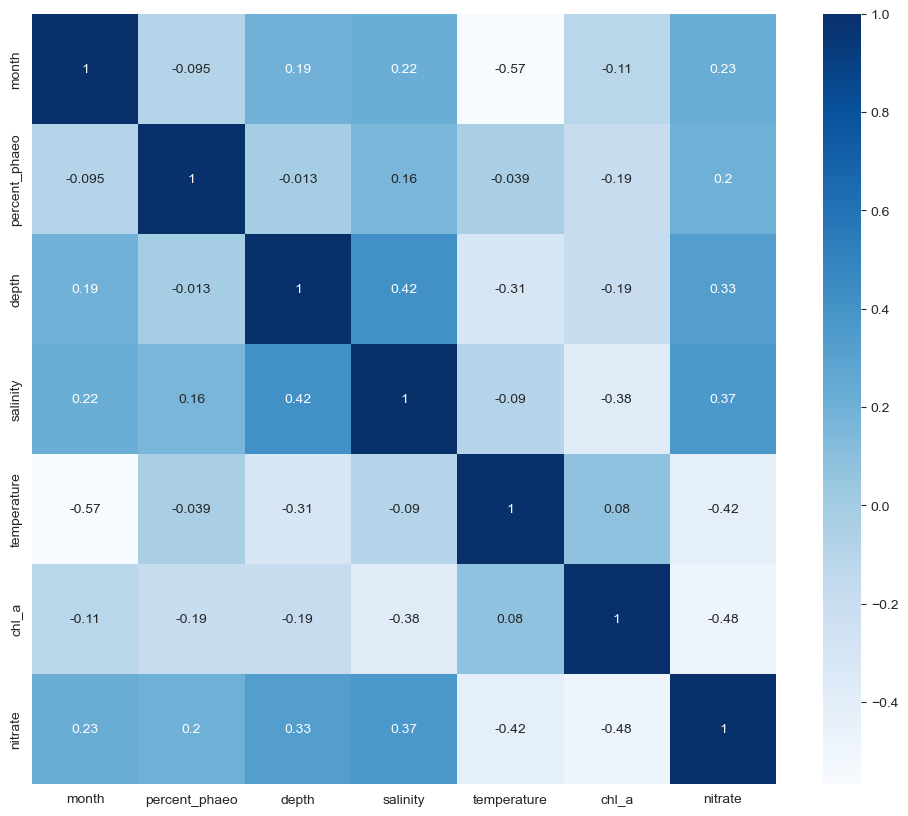

In [44]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor = sophy.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [47]:
# X_train = X_train.dropna()
model_lasso = Lasso(alpha=0.01)
# Lasso CV in sklearn (finds the right alpha for lasso)

model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

0.1483573392595989
0.07561909286424207


In [125]:
s = pd.read_excel('data/in/sophy.xlsx', sheet_name='sample', index_col=0)
s = s[['timestamp', 'percent_phaeo', 'depth', 'salinity', 'temperature', 'nitrate', 'chl_a']]
# Q1 = s.quantile(0.25)
# Q3 = s.quantile(0.75)
# IQR = Q3 - Q1
# s = s[~((s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR))).any(axis=1)]
# s.plot(x='timestamp', y='percent_phaeo', kind='scatter')

<AxesSubplot: xlabel='timestamp', ylabel='salinity'>

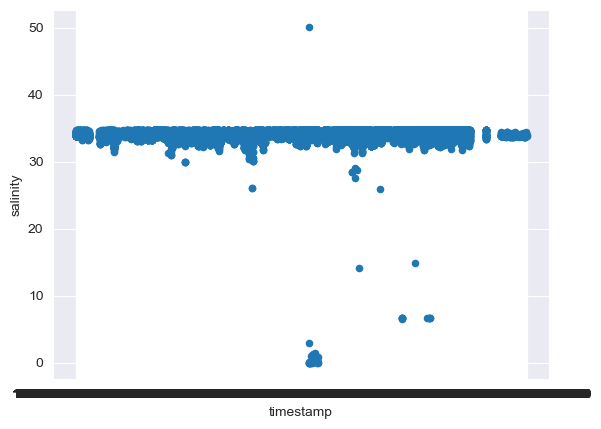

In [7]:
s.plot(x='timestamp', y='salinity', kind='scatter')

C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_5308\3885916785.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = (s - s.mean()) / s.std()
C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_5308\3885916785.py:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = (s - s.mean()) / s.std()


<AxesSubplot: xlabel='nitrate', ylabel='percent_phaeo'>

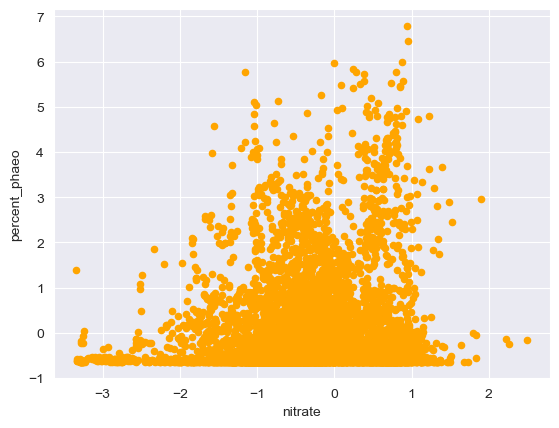

In [130]:
# Zoom in to one random range
# s['timestamp'] = pd.to_datetime(s['timestamp'])
# s['timestamp'] = pd.date_range('2000-1-1', periods=200, freq='D')

# filter outliers
# mask = (s['nitrate'] > 0) & (s['nitrate'] <= 35)
# s.loc[mask].plot(x='nitrate', y='percent_phaeo', kind='scatter', color='orange')
# Q1 = s.quantile(0.3)
# Q3 = s.quantile(0.7)
# IQR = Q3 - Q1
# trueList = ~((s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR)))
s = (s - s.mean()) / s.std()
s.plot(x='nitrate', y='percent_phaeo', kind='scatter', color='orange')

<AxesSubplot: xlabel='salinity', ylabel='percent_phaeo'>

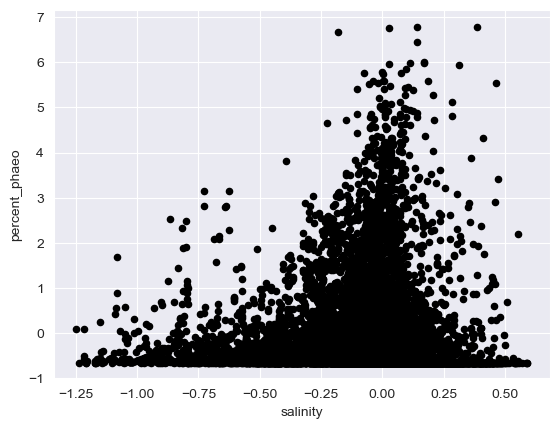

In [149]:
mask = (s['salinity'] > -1.25) & (s['salinity'] <= 4)
s.loc[mask].plot(x='salinity', y='percent_phaeo', kind='scatter', color='black')

<AxesSubplot: xlabel='temperature', ylabel='percent_phaeo'>

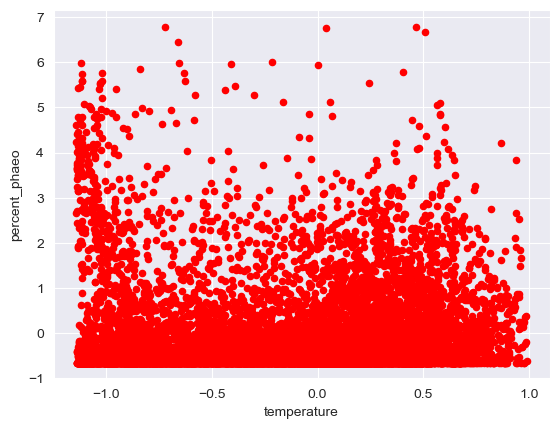

In [138]:
mask = (s['temperature'] > -2) & (s['temperature'] <= 1)
s.loc[mask].plot(x='temperature', y='percent_phaeo', kind='scatter', color='r')

<AxesSubplot: xlabel='chl_a', ylabel='percent_phaeo'>

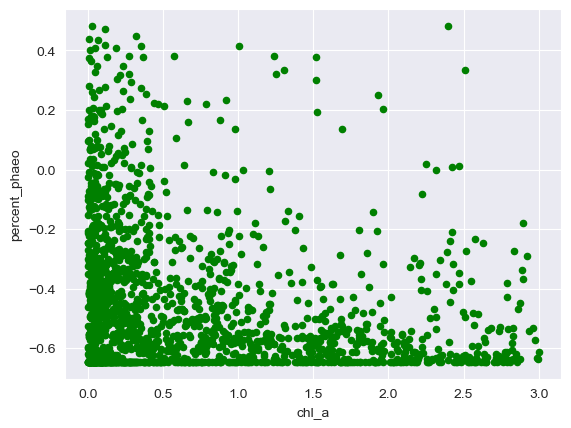

In [147]:
# Is this graph saying that phaeo contribute less to chl_a production (per sample)?
mask = (s['chl_a'] > 0) & (s['chl_a'] <= 3) & (s['percent_phaeo'] <= 0.5)
s.loc[mask].plot(x='chl_a', y='percent_phaeo', kind='scatter', color='g')

<AxesSubplot: xlabel='depth', ylabel='percent_phaeo'>

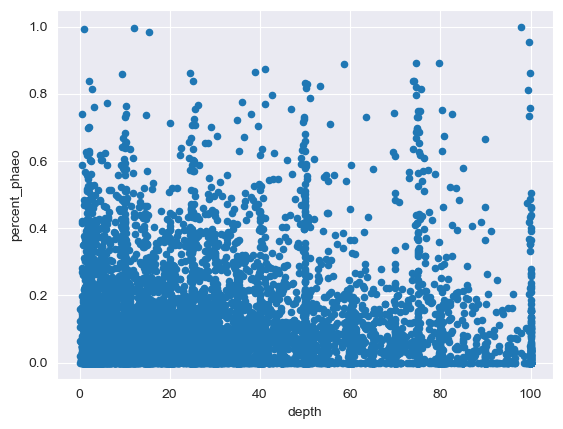

In [66]:
# Check with Hannah (could be related to sunlight)
mask = (s['depth'] > 0) & (s['depth'] <= 100)
s.loc[mask].plot(x='depth', y='percent_phaeo', kind='scatter')

In [109]:
s = pd.read_excel('data/in/sophy.xlsx', sheet_name='sample', index_col=0)
s = s[['percent_diatom', 'depth', 'salinity', 'temperature', 'nitrate', 'chl_a']]

<AxesSubplot: xlabel='nitrate', ylabel='percent_diatom'>

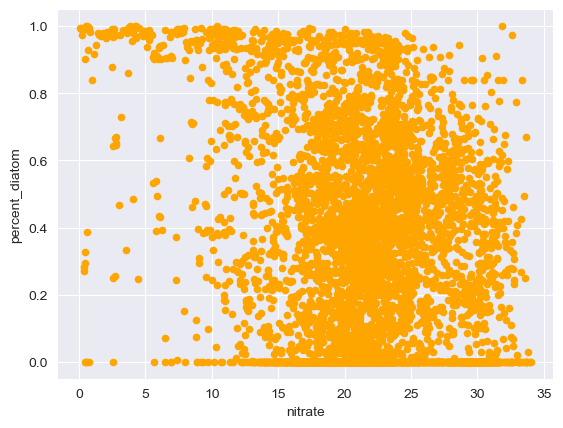

In [100]:
# filter outliers
mask = (s['nitrate'] > 0) & (s['nitrate'] <= 34)
s.loc[mask].plot(x='nitrate', y='percent_diatom', kind='scatter', color='orange')

<AxesSubplot: xlabel='salinity', ylabel='percent_diatom'>

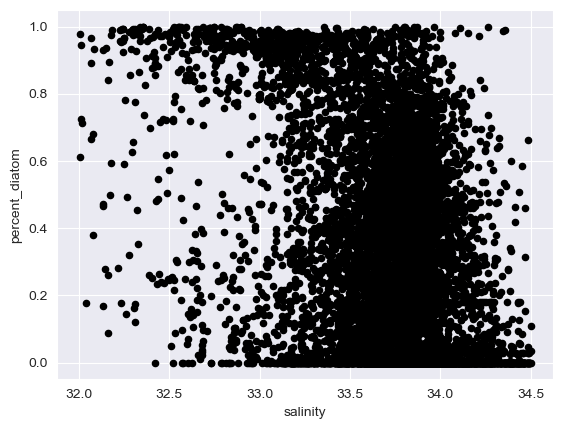

In [110]:
mask = (s['salinity'] > 32) & (s['salinity'] <= 34.5)
s.loc[mask].plot(x='salinity', y='percent_diatom', kind='scatter', color='black')

<AxesSubplot: xlabel='temperature', ylabel='percent_diatom'>

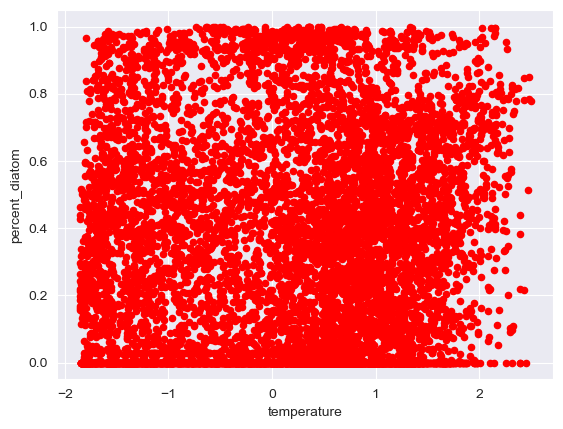

In [94]:
mask = (s['temperature'] > -2) & (s['temperature'] <= 2.5)
s.loc[mask].plot(x='temperature', y='percent_diatom', kind='scatter', color='r')

<AxesSubplot: xlabel='chl_a', ylabel='percent_diatom'>

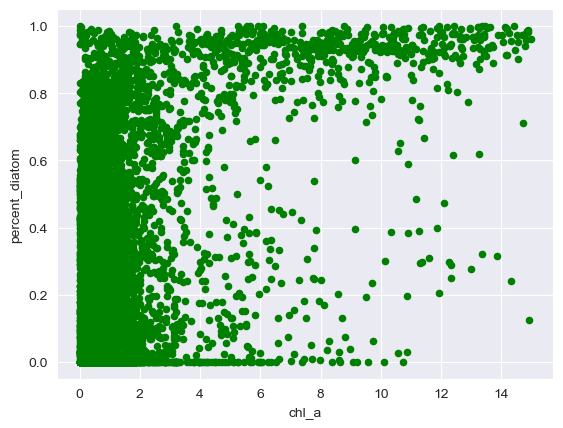

In [75]:
# Is this graph saying that diatoms contribute more to chl_a production (per sample)?
mask = (s['chl_a'] > 0) & (s['chl_a'] <= 15)
s.loc[mask].plot(x='chl_a', y='percent_diatom', kind='scatter', color='g')

<AxesSubplot: xlabel='depth', ylabel='percent_diatom'>

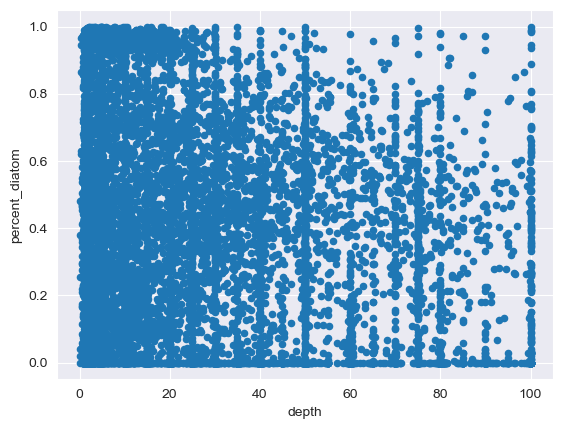

In [76]:
mask = (s['depth'] > 0) & (s['depth'] <= 100)
s.loc[mask].plot(x='depth', y='percent_diatom', kind='scatter')

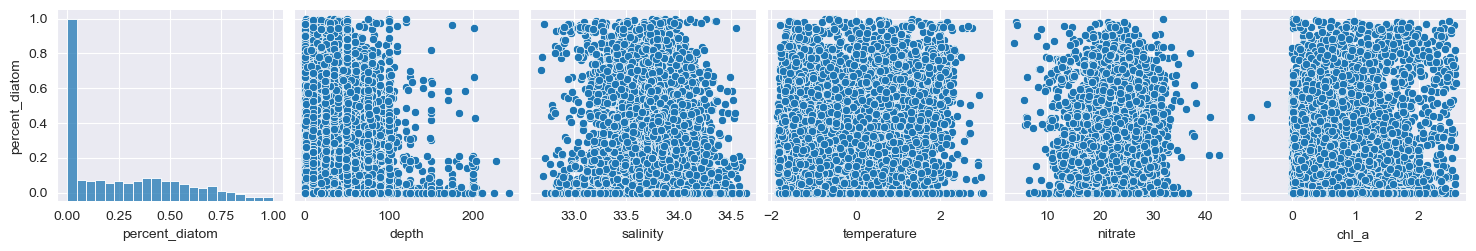

In [32]:
s = pd.read_excel('data/in/sophy.xlsx', sheet_name='sample', index_col=0)
s = s[['percent_diatom', 'depth', 'salinity', 'temperature', 'nitrate', 'chl_a']]

Q1 = s.quantile(0.25)
Q3 = s.quantile(0.75)
IQR = Q3 - Q1
s = s[~((s < (Q1 - 1.5 * IQR)) |(s > (Q3 + 1.5 * IQR))).any(axis=1)]
# s = s[np.abs(s-s.mean) <= (3*s.std)]
# s = s[(np.abs(stats.zscore(s)) < 3).all(axis=1)]
sns.pairplot(s, y_vars="percent_diatom", x_vars=s.columns.values)